In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import zipfile

In [11]:
# Will unzip the files so that you can see them..
with zipfile.ZipFile("/content/archive.zip","r") as z:
    z.extractall(".")

In [14]:
import os
for dirname, _, filenames in os.walk('/content/archive.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
# prepare text samples and their labels
print('Loading in comments...')

data = pd.read_csv("/content/archive/train.csv")
print(data.head())

Loading in comments...
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [18]:
# Feature Imformation
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [19]:
# Data Dimension
data.shape

(159571, 8)

In [20]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [21]:
# Check Missing Value

print(data["comment_text"].isna().sum())

# dropna

0


In [22]:
# check missing values in numeric columns
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
unlabelled_in_all = data[(data['toxic']!=1) & (data['severe_toxic']!=1) &
                             (data['obscene']!=1) & (data['threat']!=1) &
                             (data['insult']!=1) & (data['identity_hate']!=1)]
print('Percentage of unlabelled comments or good comments is ', len(unlabelled_in_all)/len(data)*100)

Percentage of unlabelled comments or good comments is  89.83211235124176


In [24]:
labelled_in_all = data[(data['toxic']==1) & (data['severe_toxic']==1) &
                             (data['obscene']==1) & (data['threat']==1) &
                             (data['insult']==1) & (data['identity_hate']==1)]
print('Percentage of comments which is present in all categories is ', len(labelled_in_all)/len(data)*100)

Percentage of comments which is present in all categories is  0.019427088882065038


In [25]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in train is {}'.format(len(data)))
print(data[cols_target].sum())

Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


<Axes: title={'center': 'Correlation of features & targets'}>

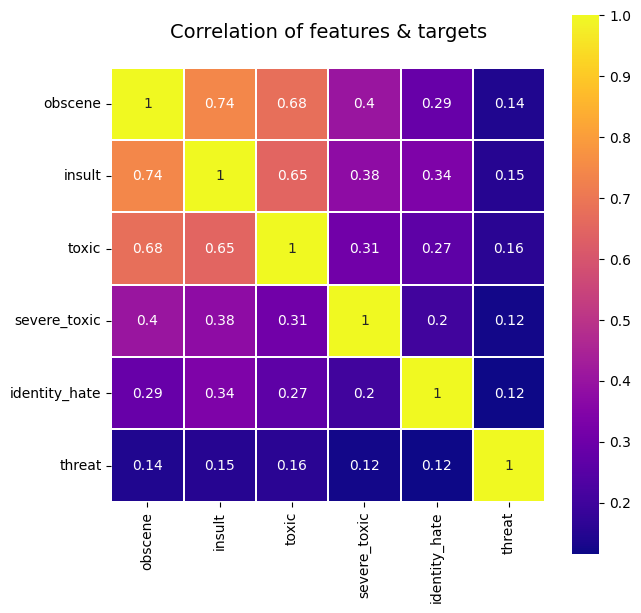

In [26]:
target_data = data[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(target_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [27]:
data['block'] =data[cols_target].sum(axis =1)
print(data['block'].value_counts())
data['block'] = data['block'] > 0
data['block'] = data['block'].astype(int)
print(data['block'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: block, dtype: int64
0    143346
1     16225
Name: block, dtype: int64


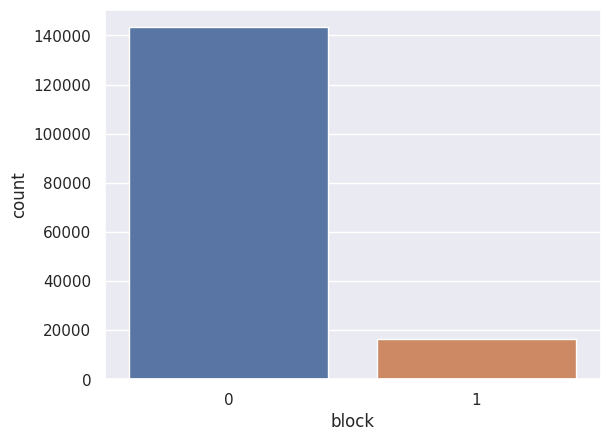

In [28]:
# look at the count plot for text length
sns.set()
sns.countplot(x="block" , data = data )
plt.show()

In [29]:
# Event Rate

print("Percentage Event Rate : " , round(100*data['block'].sum()/data.shape[0],2) , "%")

Percentage Event Rate :  10.17 %


In [30]:
# Let's look at the character length for the rows in the training data and record these
data['char_length'] = data['comment_text'].apply(lambda x: len(str(x)))

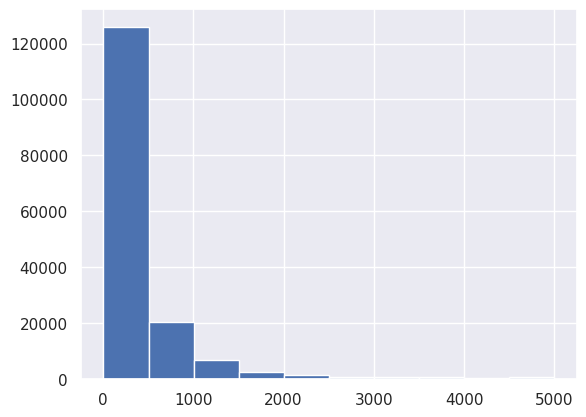

In [31]:
# look at the histogram plot for text length
sns.set()
data['char_length'].hist()
plt.show()

In [32]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [33]:
%%time
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
data['comment_text'] = data['comment_text'].map(lambda com : clean_text(com))

CPU times: user 11.8 s, sys: 29.9 ms, total: 11.8 s
Wall time: 11.9 s


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], data['block'], test_size=0.2, random_state=42)

In [35]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(127656,) (31915,)
(127656,) (31915,)


In [36]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 10000, stop_words='english')
#vect = TfidfVectorizer(stop_words='english')
print(vect)

TfidfVectorizer(max_features=10000, stop_words='english')


In [37]:
%%time
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)
# examine the document-term matrix created from X_train
X_train_dtm

CPU times: user 8.6 s, sys: 92.4 ms, total: 8.69 s
Wall time: 11.6 s


<127656x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2792162 stored elements in Compressed Sparse Row format>

In [38]:
X_train_dtm.shape

(127656, 10000)

In [39]:
100*2792162/ (127656*10000)

0.2187254809801341

In [40]:
%%time
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
X_test_dtm = vect.transform(X_test)
# examine the document-term matrix from X_test
X_test_dtm

CPU times: user 1.66 s, sys: 8.06 ms, total: 1.67 s
Wall time: 1.68 s


<31915x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 688258 stored elements in Compressed Sparse Row format>

In [41]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=1, max_iter = 2000)



# train the model using X_train_dtm & y_train
logreg.fit(X_train_dtm, y_train)
# compute the training accuracy
y_pred_train = logreg.predict(X_train_dtm)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
# compute the predicted probabilities for X_test_dtm
y_pred_test = logreg.predict(X_test_dtm)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))

Training accuracy is 0.9594613649182178
Test accuracy is 0.9563214789284036
[[28507   164]
 [ 1230  2014]]


In [42]:
#28507 -> comments  are good and predeicted as good
#2014 -> comments are block and predicted as block
#164 -> comments are good but predicted as block
#1230 -> comments are block but predicted as good

In [43]:
(28507 + 2014)/(28507+2014+164+1230)

0.9563214789284036